### This notebook is to expand the one question notebook.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

pd.set_option('display.max_columns', None)

In [2]:
# Values for this drill down
csv = '../data/yrbss_2017.csv'
location = 'XX'

In [3]:
# Create a dataframe which holds just the rows needed to be looped over in this notebook
yrbss = pd.read_csv(csv)
us = yrbss[yrbss['LocationAbbr'] == location]

In [32]:
def question_loop(topic, subtopic, risk_question, question_df):
    global question

    Gender = ['Male', 'Female']
    Race = ['Asian', 'Black or African American', 'Hispanic or Latino', 'White', 
        'Multiple Race', 'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander']
    Sexuality = ['Gay or lesbian', 'Bisexual', 'Not sure', 'Heterosexual (straight)']
    
    group = []
    data_val = []
    low_val = []
    high_val = []
    significance = []

    # The overall results for this question, all significance tests will go against these values
    q_total = question_df[(question_df['Grade'] == 'Total') & (question_df['Sex'] == 'Total') &
        (question_df['Race'] == 'Total') & (question_df['SexualIdentity'] == 'Total') & 
        (question_df['SexOfSexualContacts'] == 'Total')]
    q_val = q_total['Greater_Risk_Data_Value'].iloc[0]
    q_low = q_total['Greater_Risk_Low_Confidence_Limit'].iloc[0]
    q_high = q_total['Greater_Risk_High_Confidence_Limit'].iloc[0]
    # print('q_total', q_val, q_low, q_high)
    
    for gender in Gender:
        web_total = question_df[(question_df['Grade'] == 'Total') & (question_df['Sex'] == gender) &
            (question_df['Race'] == 'Total') & (question_df['SexualIdentity'] == 'Total') & 
            (question_df['SexOfSexualContacts'] == 'Total')]
        g_val = web_total['Greater_Risk_Data_Value'].iloc[0]
        g_low = web_total['Greater_Risk_Low_Confidence_Limit'].iloc[0]
        g_high = web_total['Greater_Risk_High_Confidence_Limit'].iloc[0]
        if g_val < q_low and q_val > g_high:
            group.append(gender)
            data_val.append(g_val)
            low_val.append(g_low)
            high_val.append(g_high)
            significance.append('less')
        elif g_val > q_high and q_val < g_low:
            group.append(gender)
            data_val.append(g_val)
            low_val.append(g_low)
            high_val.append(g_high)
            significance.append('more')
    for race in Race:
        web_total = question_df[(question_df['Grade'] == 'Total') & (question_df['Sex'] == 'Total') &
            (question_df['Race'] == race) & (question_df['SexualIdentity'] == 'Total') & 
            (question_df['SexOfSexualContacts'] == 'Total')]
        g_val = web_total['Greater_Risk_Data_Value'].iloc[0]
        g_low = web_total['Greater_Risk_Low_Confidence_Limit'].iloc[0]
        g_high = web_total['Greater_Risk_High_Confidence_Limit'].iloc[0]
        if g_val < q_low and q_val > g_high:
            group.append(race)
            data_val.append(g_val)
            low_val.append(g_low)
            high_val.append(g_high)
            significance.append('less')
        elif g_val > q_high and q_val < g_low:
            group.append(race)
            data_val.append(g_val)
            low_val.append(g_low)
            high_val.append(g_high)
            significance.append('more')
    for sexuality in Sexuality:
        web_total = question_df[(question_df['Grade'] == 'Total') & (question_df['Sex'] == 'Total') &
            (question_df['Race'] == 'Total') & (question_df['SexualIdentity'] == sexuality) & 
            (question_df['SexOfSexualContacts'] == 'Total')]
        g_val = web_total['Greater_Risk_Data_Value'].iloc[0]
        g_low = web_total['Greater_Risk_Low_Confidence_Limit'].iloc[0]
        g_high = web_total['Greater_Risk_High_Confidence_Limit'].iloc[0] 
        if g_val < q_low and q_val > g_high:
            group.append(sexuality)
            data_val.append(g_val)
            low_val.append(g_low)
            high_val.append(g_high)
            significance.append('less')
        elif g_val > q_high and q_val < g_low:
            group.append(sexuality)
            data_val.append(g_val)
            low_val.append(g_low)
            high_val.append(g_high)
            significance.append('more')
            
    question_results_df = pd.DataFrame.from_dict({'topic': topic,'group': group, 
            'data_val': data_val, 'low_val': low_val,
            'high_val': high_val, 'significance': significance})
    return question_results_df
    

In [33]:
question_results_df = pd.DataFrame()
for topic in us['Topic'].value_counts().items():
    #print('topic', topic)
    topic_df = us[us['Topic'] == topic[0]]
    for subtopic in topic_df['Subtopic'].value_counts().items():
        #print('subtopic', subtopic)
        subtopic_df = topic_df[topic_df['Subtopic'] == subtopic[0]]
        for risk_question in subtopic_df['Greater_Risk_Question'].value_counts().items():
            #print('risk_question', risk_question)
            risk_question_df = subtopic_df[subtopic_df['Greater_Risk_Question'] == risk_question[0]]
            results_df = question_loop(topic[0], subtopic[0], risk_question[0], risk_question_df)
            question_results_df = question_results_df.append(results_df)
question_results_df.shape

(582, 6)

In [34]:
question_results_df.shape

(582, 6)

In [35]:
question_results_df.head()

,topic,group,data_val,low_val,high_val,significance
0,Dietary Behaviors,Male,4.9809,4.2071,5.8883,more
1,Dietary Behaviors,Female,2.6595,1.9490,3.6196,less
2,Dietary Behaviors,Black or African American,6.7107,5.5784,8.0533,more
3,Dietary Behaviors,Not sure,6.4889,4.2498,9.7871,more
0,Dietary Behaviors,Male,16.8622,15.3162,18.5302,more


In [44]:
Group = ['Male', 'Female', 'Asian', 'Black or African American', 'Hispanic or Latino', 'White', 
        'Multiple Race', 'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander',
         'Gay or lesbian', 'Bisexual', 'Not sure', 'Heterosexual (straight)']
uiv_df = question_results_df[question_results_df['topic'] == 'Unintentional Injuries and Violence']
count_df = pd.DataFrame(0, index=['more','less'], columns=Group)

for index, row in uiv_df.iterrows():
    count_df.at[row['significance'],row['group']] = count_df.at[row['significance'],row['group']] + 1
print('Unintentional Injuries and Violence')
count_df

Unintentional Injuries and Violence


,Male,Female,Asian,Black or African American,Hispanic or Latino,White,Multiple Race,American Indian or Alaska Native,Native Hawaiian or Other Pacific Islander,Gay or lesbian,Bisexual,Not sure,Heterosexual (straight)
more,8,10,0,7,5,3,8,2,0,10,15,15,0
less,11,7,9,7,3,6,0,0,0,0,0,0,11


In [46]:
Group = ['Male', 'Female', 'Asian', 'Black or African American', 'Hispanic or Latino', 'White', 
        'Multiple Race', 'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander',
         'Gay or lesbian', 'Bisexual', 'Not sure', 'Heterosexual (straight)']
count_df = pd.DataFrame(0, index=['more','less'], columns=Group)


for index, row in question_results_df.iterrows():
    count_df.at[row['significance'],row['group']] = count_df.at[row['significance'],row['group']] + 1
count_df

,Male,Female,Asian,Black or African American,Hispanic or Latino,White,Multiple Race,American Indian or Alaska Native,Native Hawaiian or Other Pacific Islander,Gay or lesbian,Bisexual,Not sure,Heterosexual (straight)
more,50,23,4,39,26,10,13,23,1,42,69,40,1
less,26,47,57,30,19,22,1,1,3,1,7,7,20


(array([0, 1]), [Text(0, 0, 'more'), Text(1, 0, 'less')])

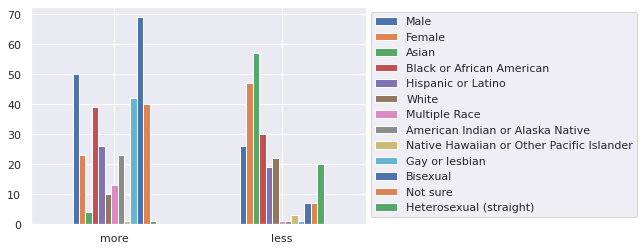

In [50]:
count_df.plot.bar()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation='horizontal')

In [36]:
for group in question_results_df['group'].value_counts().items():
    print(group[0])
    print(question_results_df[question_results_df['group'] == group[0]]['significance'].value_counts())
    print()

Bisexual
more    69
less     7
Name: significance, dtype: int64

Male
more    50
less    26
Name: significance, dtype: int64

Female
less    47
more    23
Name: significance, dtype: int64

Black or African American
more    39
less    30
Name: significance, dtype: int64

Asian
less    57
more     4
Name: significance, dtype: int64

Not sure
more    40
less     7
Name: significance, dtype: int64

Hispanic or Latino
more    26
less    19
Name: significance, dtype: int64

Gay or lesbian
more    42
less     1
Name: significance, dtype: int64

White
less    22
more    10
Name: significance, dtype: int64

American Indian or Alaska Native
more    23
less     1
Name: significance, dtype: int64

Heterosexual (straight)
less    20
more     1
Name: significance, dtype: int64

Multiple Race
more    13
less     1
Name: significance, dtype: int64

Native Hawaiian or Other Pacific Islander
less    3
more    1
Name: significance, dtype: int64



In [23]:
question_results_df['significance'].value_counts()

more    413
less    249
Name: significance, dtype: int64

In [24]:
question_results_df['topic'].value_counts()

Unintentional Injuries and Violence        153
Alcohol and Other Drug Use                 127
Tobacco Use                                122
Dietary Behaviors                           81
Sexual Behaviors                            69
Physical Activity                           52
Other Health Topics                         30
Obesity, Overweight, and Weight Control     28
Name: topic, dtype: int64

In [38]:
# for this to work need to create a new dataframe with counts of significance or something like that
ax = sns.heatmap(question_results_df, cmap="PiYG")

ValueError: could not convert string to float: 'Dietary Behaviors'